<a href="https://colab.research.google.com/github/shasashe/Emotion-Detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install DeepFace
!pip install deepface

# Imports
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0d7c6b72f45a66c5dbe221f85cad5bd72d083145cef8a393f8b17562c290bd4b
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
25-06-26 23:36:10 - Directory /root/.deepface has been created
25-06-26 23:36:10 - Directory /root/.deepface/weights has been created


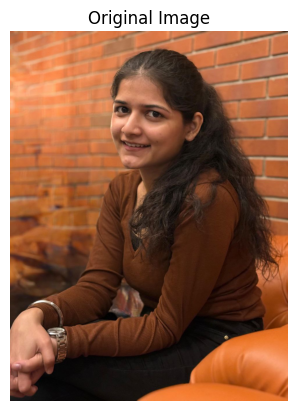

In [2]:
# Load the image (BGR format)
img_path = "photo_2025-06-26_02-07-49.jpg"
img = cv2.imread(img_path)

# Convert BGR to RGB for correct display with matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image")
plt.show()


In [3]:
# Analyze the image
result = DeepFace.analyze(img, actions=['emotion'], enforce_detection=False)

# Print top emotion result
dominant_emotion = result[0]['dominant_emotion']
print("Detected Emotion:", dominant_emotion)

# Optional: Print full result
# print(result)


25-06-26 23:38:11 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 71.2MB/s]


Detected Emotion: happy


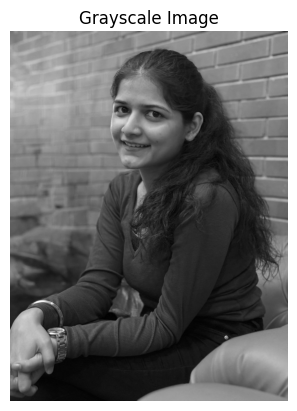

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()


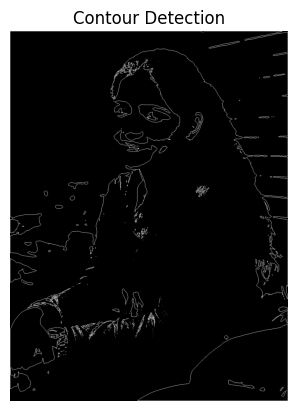

In [5]:
# Apply binary threshold
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a blank canvas
contour_img = np.zeros_like(gray)
cv2.drawContours(contour_img, contours, -1, 255, 1)

plt.imshow(contour_img, cmap='gray')
plt.axis('off')
plt.title("Contour Detection")
plt.show()


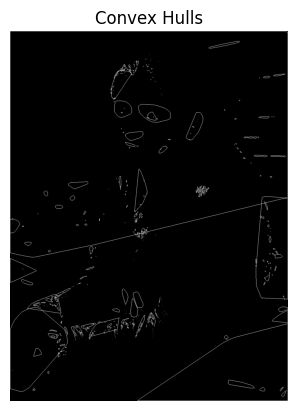

In [6]:
# Compute convex hulls
hulls = [cv2.convexHull(cnt) for cnt in contours]

# Draw hulls on a blank canvas
hull_img = np.zeros_like(gray)
cv2.drawContours(hull_img, hulls, -1, 255, 1)

plt.imshow(hull_img, cmap='gray')
plt.axis('off')
plt.title("Convex Hulls")
plt.show()


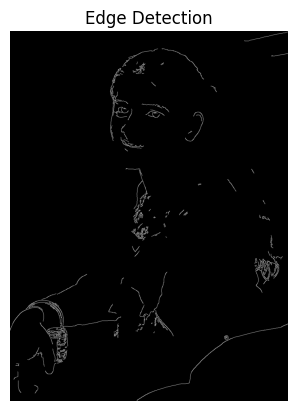

In [7]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Edge Detection")
plt.show()


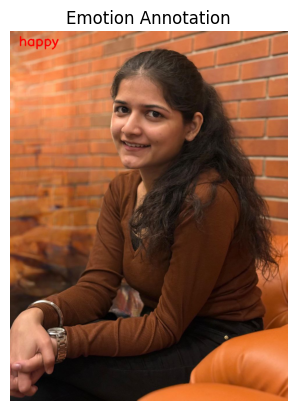

In [8]:
# Draw emotion label on image
annotated = img.copy()
cv2.putText(annotated, dominant_emotion, (30, 50), cv2.FONT_HERSHEY_SIMPLEX,
            1.5, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emotion Annotation")
plt.show()
